# Basketball YOLOv5
Dataset obtained:

https://universe.roboflow.com/roboflow-universe-projects/basketball-players-fy4c2/dataset/25

Version YOLOv8 (Yv5 dataset was not downloaded so that the same dataset could be use during this training)

## Librerías iniciales

### Para limpiar el caché

#Para limpiar caché
!find . -name "*.pyc" -delete
!find . -name "__pycache__" -type d -exec rm -r {} +

### Importamos librerías

In [1]:
#Ultralytics update
!pip install -U ultralytics

In [2]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Estilo de gráficos a utilizar
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

## Plotting random train samples

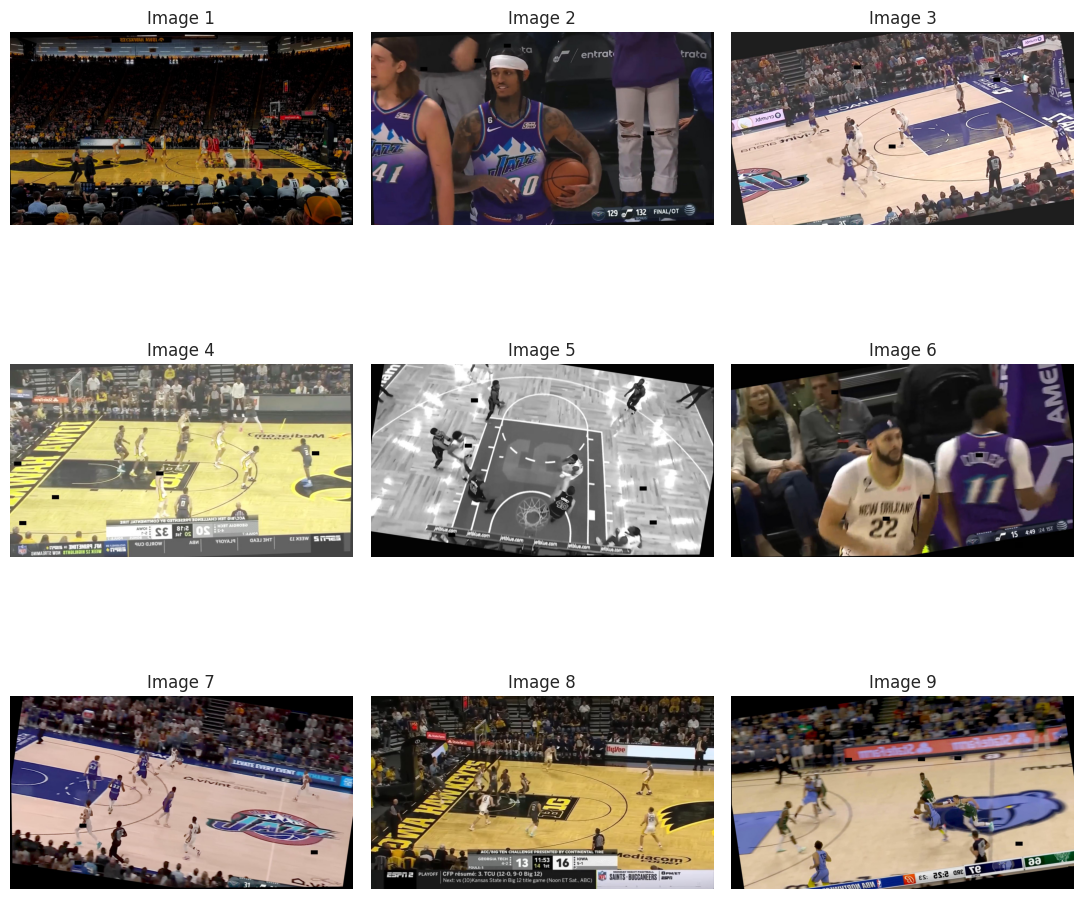

In [4]:
#Image directory for train samples
Image_dir = '/home/alide/Documentos/IA/Proyecto/BasketballYv8/train/images'

#To show samples
num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images for plotting
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

## YOLOv5 Training

In [5]:
# Use a pretrained YOLOv5n model
model = YOLO("yolov5nu.pt") 


image 1/1 /home/alide/Documentos/IA/Proyecto/BasketballYv8/train/images/Iowa_Nebraska-2023-03-06-college-men_mp4-84_jpg.rf.d3516153709fa49b1393ee3247f290ba.jpg: 384x640 6 persons, 3 chairs, 103.8ms
Speed: 2.0ms preprocess, 103.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


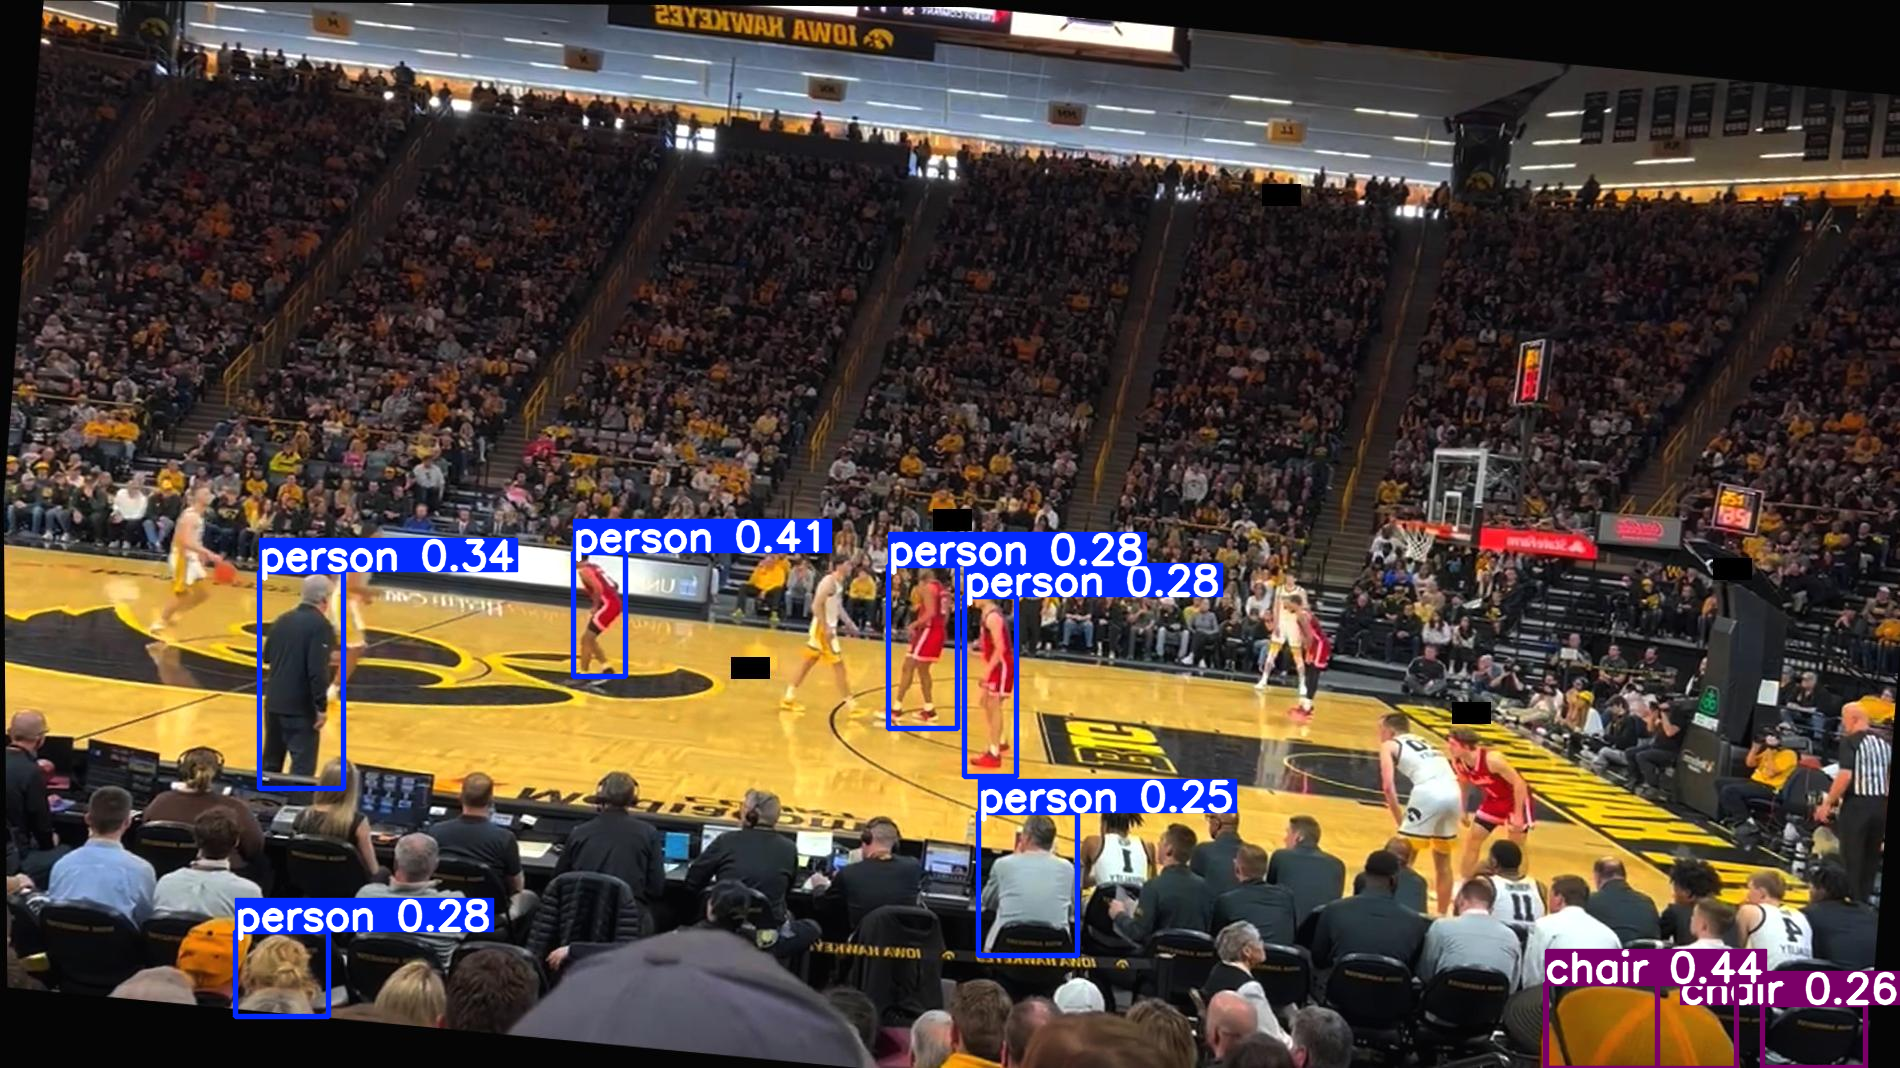

In [6]:
# Use the model to detect object
image = "/home/alide/Documentos/IA/Proyecto/BasketballYv8/train/images/Iowa_Nebraska-2023-03-06-college-men_mp4-84_jpg.rf.d3516153709fa49b1393ee3247f290ba.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [7]:
# Build from YAML and transfer weights
Training_model = YOLO('yolov5nu.pt')

In [ ]:
#Training
Result_Training_model = Training_model.train(data="/home/alide/Documentos/IA/Proyecto/BasketballYv8/data.yaml",
                                             epochs = 80, batch = 4, optimizer = 'auto')

Ultralytics 8.3.105 🚀 Python-3.10.16 torch-2.6.0+cu124 CPU (AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx)
engine/trainer: task=detect, mode=train, model=yolov5nu.pt, data=/home/alide/Documentos/IA/Proyecto/BasketballYv8/data.yaml, epochs=80, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

train: Scanning /home/alide/Documentos/IA/Proyecto/BasketballYv8/train/labels...


train: New cache created: /home/alide/Documentos/IA/Proyecto/BasketballYv8/train/labels.cache


val: Scanning /home/alide/Documentos/IA/Proyecto/BasketballYv8/valid/labels... 1

val: New cache created: /home/alide/Documentos/IA/Proyecto/BasketballYv8/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


Corrupt JPEG data: 1 extraneous bytes before marker 0xd9        56        640:  
       1/80         0G      1.864      2.653      1.396        167        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100       1509      0.614      0.261      0.199     0.0925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


Corrupt JPEG data: 1 extraneous bytes before marker 0xd9        94        640:  
       2/80         0G      1.619      1.596      1.253         93        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100       1509      0.428      0.312      0.355      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


Corrupt JPEG data: 1 extraneous bytes before marker 0xd9        81        640:  
       3/80         0G      1.569      1.371      1.228         90        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100       1509      0.487      0.413      0.421      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


Corrupt JPEG data: 1 extraneous bytes before marker 0xd9        51        640:  
       4/80         0G      1.482       1.22      1.174        118        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100       1509      0.573      0.437       0.47      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


Corrupt JPEG data: 1 extraneous bytes before marker 0xd9        69        640:  
       5/80         0G      1.442      1.147      1.168        111        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100       1509      0.582      0.425      0.471      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


Corrupt JPEG data: 1 extraneous bytes before marker 0xd9       118        640:  
       6/80         0G       1.42      1.081      1.146        173        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100       1509      0.528      0.458      0.486      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


Corrupt JPEG data: 1 extraneous bytes before marker 0xd9       113        640:  
       7/80         0G       1.37       1.03      1.123        160        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100       1509      0.548      0.462      0.492      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


Corrupt JPEG data: 1 extraneous bytes before marker 0xd9        92        640:  
       8/80         0G      1.392      1.026      1.127         70        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100       1509      0.599      0.483      0.504       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


Corrupt JPEG data: 1 extraneous bytes before marker 0xd9       127        640:  
       9/80         0G      1.328      0.963      1.104         70        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100       1509      0.703      0.475      0.534      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


Corrupt JPEG data: 1 extraneous bytes before marker 0xd9       121        640:  
      10/80         0G      1.309     0.9328      1.093        140        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100       1509      0.635      0.472      0.514      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


Corrupt JPEG data: 1 extraneous bytes before marker 0xd9       113        640:  
      11/80         0G      1.303     0.9215       1.09        106        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100       1509      0.635      0.506      0.546      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


Corrupt JPEG data: 1 extraneous bytes before marker 0xd9        75        640:  
      12/80         0G      1.305     0.8978      1.083        175        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100       1509      0.639      0.521      0.552      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/80         0G      1.251     0.9106      1.074         74        640:  

## Post-training Results

In [ ]:
#Function for showing results
def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        if img is None:
            print(f"❌ Could not read image: {image_path}")
            continue
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/home/alide/Documentos/IA/Proyecto/runs/detect/train'

# Display the images
display_images(post_training_files_path, image_files)

## Best performing model and example

In [ ]:
# Loading the best performing model
Final_model = YOLO('/home/alide/Documentos/IA/Proyecto/runs/detect/train/weights/best.pt')

# Evaluating the model on the validset
metrics = Final_model.val(split = 'val')

# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

### Exporting the model

In [ ]:
#Install dependencies
!pip install onnx
!pip install onnxruntime

In [ ]:
#Export the model
Final_model.export(format='onnx')

### Example using Final_Model with the same img used with the pre trained model

In [ ]:
image = "/home/alide/Documentos/IA/Proyecto/BasketballYv8/train/images/Iowa_Nebraska-2023-03-06-college-men_mp4-84_jpg.rf.d3516153709fa49b1393ee3247f290ba.jpg"
result_predict = Final_model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

## FInal Model architecture

In [ ]:
Final_model